In [102]:
# We are here going to implement ANN which is Artificial neural network

In [1]:
!pip install -U tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.2 MB/s  0:00:00 eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.0.38 requires langchain-core<0.2.0,>=0.1.52, but you have langchain-core 1.0.4 which is incompatible.
langchain-community 0.0.38 requires langsmith<0.2.0,>=0.1.0, but you have langsmith 0.4.42 which is incompatible.
langchain-community 0.0.38 requires numpy<2,>=1, but you have numpy 2.4.0 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.4.0 which is incompatible.


In [104]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [105]:
# import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [107]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [108]:
# Exited is my dependent feature and rest all are my independent features

In [109]:
## Divide the dataset into dependent and independent features

In [110]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [111]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [112]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [113]:
## Feature Engineering - Handling categorical features

In [114]:
# Convert into one hot encoded
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [115]:
## Concatenating these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [116]:
X=pd.concat([X,geography,gender],axis=1)

In [117]:
# Splitting the dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [119]:
## Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [120]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [121]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [122]:
X_train.shape

(8000, 11)

In [123]:
## Part 2 : Lets create the ANN

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [125]:
## Lets initialize the ANN
classifier=Sequential()

In [126]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [127]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
## Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [129]:
## Adding the ouput layer (Binary Classification)
classifier.add(Dense(1,activation='sigmoid'))

In [130]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
## By default adam uses a learning rate of 0.01

In [131]:
## To provide your own learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [132]:
## Ealry Stopping - Makes sure that when accuracy of the model is not increasing the training of the model will stop automatically
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [133]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.7617 - loss: 0.5385 - val_accuracy: 0.8137 - val_loss: 0.3999
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8245 - loss: 0.4092 - val_accuracy: 0.8413 - val_loss: 0.3795
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8397 - loss: 0.3829 - val_accuracy: 0.8413 - val_loss: 0.3776
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8349 - loss: 0.3859 - val_accuracy: 0.8440 - val_loss: 0.3686
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8451 - loss: 0.3695 - val_accuracy: 0.8451 - val_loss: 0.3647
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8468 - loss: 0.3762 - val_accuracy: 0.8448 - val_loss: 0.3726
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8411 - loss: 0.3812 - val_accuracy: 0.8489 - val_loss: 0.3628
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8481 - loss: 0.3702 

In [134]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

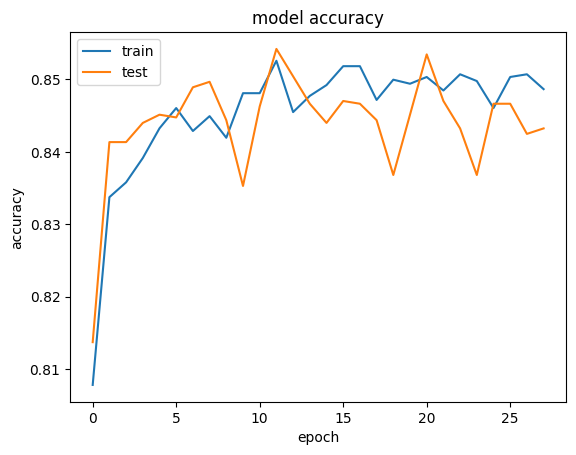

In [135]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


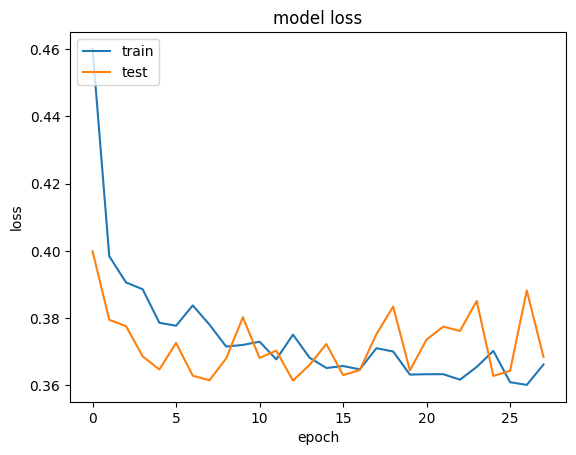

In [136]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [137]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [138]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1568,   27],
       [ 246,  159]])

In [139]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [140]:
score

0.8635

In [141]:
## Get the weights
classifier.get_weights()

[array([[ 5.0324732e-01,  2.0221658e-01,  3.1984407e-02,  9.7466847e-03,
         -4.8129588e-01, -1.0528388e+00, -1.0192428e-01,  1.0065371e-01,
          1.4863549e-01, -2.1186504e-01, -4.3538132e-01],
        [ 3.2815558e-01, -7.8402674e-01,  1.1085740e+00, -5.4839444e-01,
          8.9554250e-01, -1.0153073e+00,  1.6624146e+00, -2.8197093e+00,
         -1.2940515e+00, -1.4779624e-01,  1.9129137e+00],
        [ 1.4808919e-01,  1.4010359e+00, -7.6001072e-01,  9.6267289e-01,
         -2.4414171e-01, -7.4387483e-02, -5.4757655e-01, -2.7356553e-01,
          7.7824913e-02, -1.1442582e-01,  8.2185376e-01],
        [ 2.0651641e+00, -1.6046420e+00,  1.6866083e+00, -3.8163120e-01,
         -1.0459439e+00,  1.1973429e+00, -3.6437446e-01,  1.2108079e-02,
         -6.5111762e-01,  1.5147221e-01,  5.8462389e-02],
        [-3.8558292e-01, -4.3034285e-02,  2.5362718e+00,  1.9533364e+00,
         -3.5687623e+00, -3.7052619e-01, -3.6060369e-01,  3.2000366e-01,
         -7.4649602e-02,  2.7364101e+0